# California House Pricing

<img src="flow_chart.png" height=200px width=800px></img>

## 01: Framing the problem

Build a model of housing prices in California using the California using the Calidornia census data. This data has metrics such as the population, median income, medina housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data.

## 02 : Obtain Data

#### Importing the basic required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

#### Reading the data from CSV file

In [2]:
housing_data = pd.read_csv('housing.csv')

## 03 : Analyze Data

#### Obtaining a glimpse of data

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Generating a Correlation heatmap

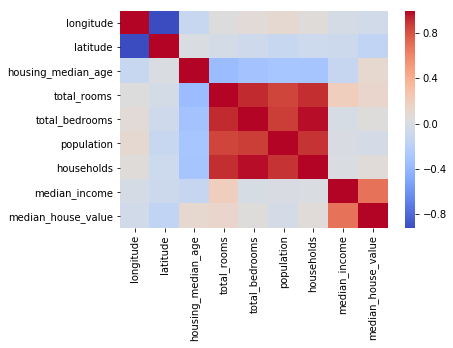

In [8]:
corr = housing_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap='coolwarm')

In [9]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


#### Generating a StripPlot heatmap

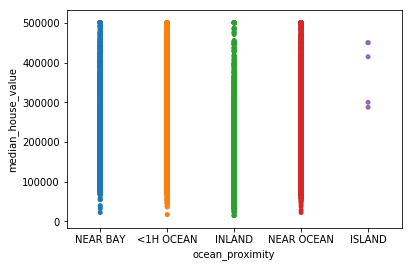

In [10]:
sns.stripplot(x="ocean_proximity", y="median_house_value", data=housing_data)

## 04 : Feature Engineering

In [11]:
#sns.swarmplot(x="ocean_proximity",y="median_house_value",data=housing_data)

#### Fill the missing values in the obtained data

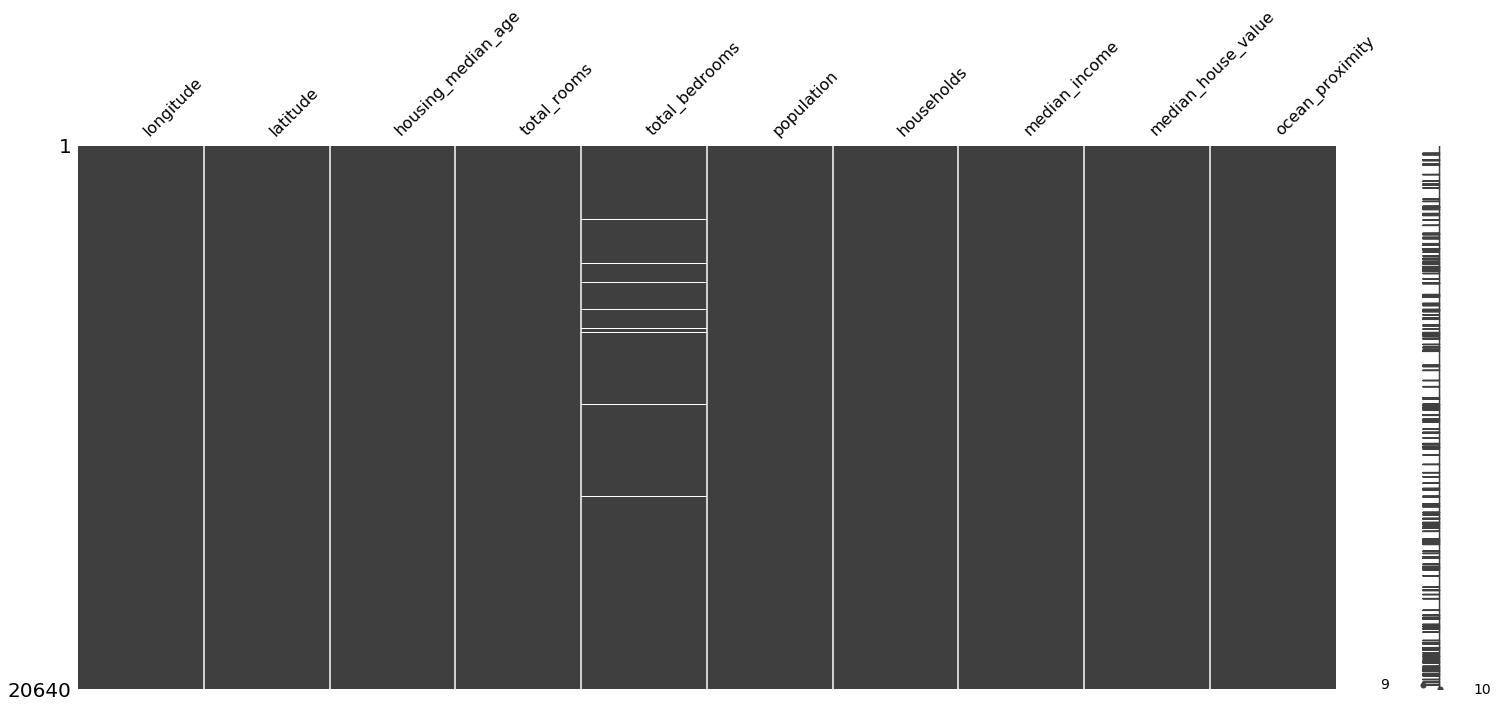

In [12]:
ms.matrix(housing_data)

#Visualize the data to see if there are any missing values

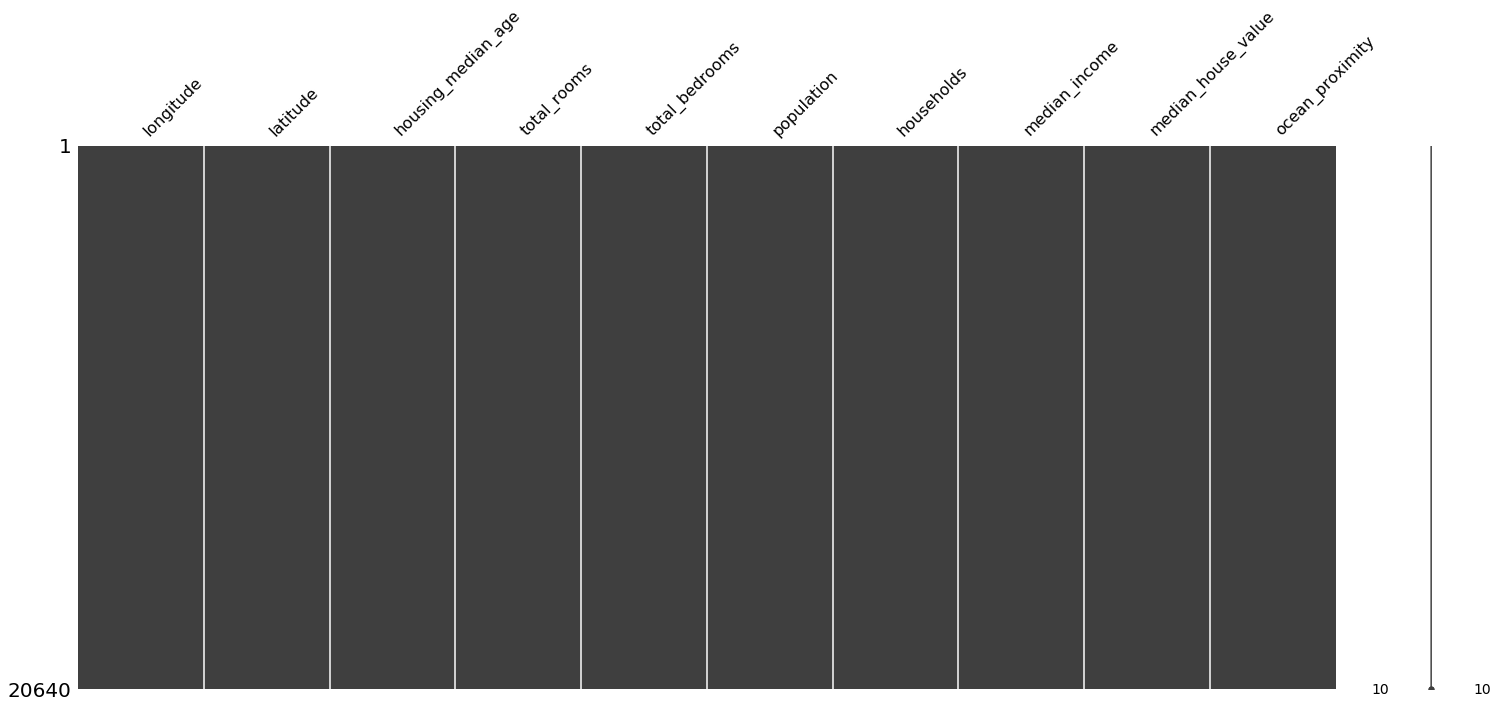

In [13]:
#Fill the missing values
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].mean(), inplace=True)
ms.matrix(housing_data)

### Categorical value conversion

In [14]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
#get_dummies() is used to convert the 'ocean_proximity', a column with categorical values, into numerical values
df = pd.get_dummies(housing_data['ocean_proximity'], drop_first=1)

#concatinating the dataframe with dummy columns of 'ocean_proximity' to housing_data
housing_data = pd.concat([housing_data, df], axis=1)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
dtypes: float64(9), object(1), uint8(4)
memory usage: 1.7+ MB


In [17]:
import math
housing_data['total_bedrooms'] = list(map(math.ceil,(housing_data['total_bedrooms'])))
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0
5,-122.25,37.85,52.0,919.0,213,413.0,193.0,4.0368,269700.0,NEAR BAY,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489,1094.0,514.0,3.6591,299200.0,NEAR BAY,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687,1157.0,647.0,3.1200,241400.0,NEAR BAY,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665,1206.0,595.0,2.0804,226700.0,NEAR BAY,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707,1551.0,714.0,3.6912,261100.0,NEAR BAY,0,0,1,0


In [18]:
#Since we have created dummy columns for 'ocean_proximity', we are dropping the column
housing_data.drop('ocean_proximity', inplace=True, axis=1)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null int64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
dtypes: float64(8), int64(1), uint8(4)
memory usage: 1.5 MB


In [19]:
housing_data['households']

0         126.0
1        1138.0
2         177.0
3         219.0
4         259.0
5         193.0
6         514.0
7         647.0
8         595.0
9         714.0
10        402.0
11        734.0
12        468.0
13        174.0
14        620.0
15        264.0
16        331.0
17        303.0
18        419.0
19        275.0
20        166.0
21        366.0
22        478.0
23        325.0
24        422.0
25        119.0
26        239.0
27        397.0
28        473.0
29        155.0
          ...  
20610     439.0
20611     409.0
20612     267.0
20613     384.0
20614     474.0
20615     197.0
20616     375.0
20617     114.0
20618     226.0
20619     296.0
20620      48.0
20621     157.0
20622     157.0
20623     227.0
20624     291.0
20625      14.0
20626     171.0
20627      59.0
20628     390.0
20629    1818.0
20630     445.0
20631     432.0
20632     385.0
20633     382.0
20634     344.0
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length

In [20]:
#dataframe.columns returns a list of all the columns in the dataframe
housing_data.columns
housing_data[['median_income','median_house_value']]
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066659,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066659,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.006434,-0.004362,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006434,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


## 05 : Model Selection

### Train-Test Split

<img src = "supervised_flow_chart.png"></img>

In [65]:
X = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]

y = housing_data['median_house_value']

#Importing the train_test_split from sklearn to split the dataset for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

### Linear Regression

#### Training the model

In [66]:
#Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

#Initializing the model
lm = LinearRegression()

#Fit the data to the algorithm
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting the model on the test set

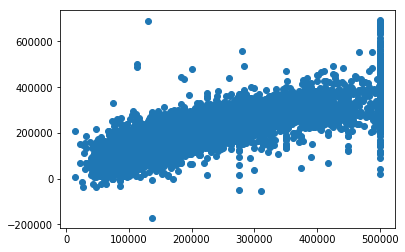

In [67]:
#Generating a Scatter Plot to evaluate the correctness of validation set against the predicted data
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

## 06 : Evaluate the predictions

In [68]:
from sklearn import metrics
#Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

#Mean Square Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))

#Mean Square Root Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 49813.74949523861
MSE: 4760795083.425423
RMSE: 68998.51508130753


## 07 : Predicting on Validation set
### This problem doesn't have a validation set.